#### 5. Create an RNN-based sentiment analysis system to classify  text  reviews  (such  as  movie  reviews  or product reviews) into positive, negative, or neutral sentiments.  Use  datasets  containing  labeled  text data for training and testing the model's accuracy in sentiment classification.
IMDB dataset from `tensorflow.keras.datasets` used.

In [81]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, Dropout, LSTM, Bidirectional # type: ignore
from tensorflow.keras.datasets import imdb # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore

In [82]:
max_words = 10000
max_len = 200

In [83]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [84]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [85]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(8, return_sequences=False)),
    # SimpleRNN(64, activation='relu'),
    # Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [86]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [87]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64, 
    validation_data=(X_test, y_test)
)

Epoch 1/10
391/391 [==============================] - 34s 79ms/step - loss: 0.4394 - accuracy: 0.7983 - val_loss: 0.3526 - val_accuracy: 0.8534
Epoch 2/10
391/391 [==============================] - 30s 77ms/step - loss: 0.2610 - accuracy: 0.9008 - val_loss: 0.3823 - val_accuracy: 0.8484
Epoch 3/10
391/391 [==============================] - 30s 76ms/step - loss: 0.1805 - accuracy: 0.9348 - val_loss: 0.3493 - val_accuracy: 0.8608
Epoch 4/10
391/391 [==============================] - 33s 85ms/step - loss: 0.1157 - accuracy: 0.9617 - val_loss: 0.4012 - val_accuracy: 0.8628
Epoch 5/10
391/391 [==============================] - 34s 87ms/step - loss: 0.0781 - accuracy: 0.9747 - val_loss: 0.5124 - val_accuracy: 0.8594
Epoch 6/10
391/391 [==============================] - 34s 87ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.5502 - val_accuracy: 0.8481
Epoch 7/10
391/391 [==============================] - 33s 84ms/step - loss: 0.0400 - accuracy: 0.9866 - val_loss: 0.6300 - val_accuracy:

In [88]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss}")

782/782 [==============================] - 8s 10ms/step - loss: 0.7148 - accuracy: 0.8522
Test Accuracy: 85.22%
Test Loss: 0.7147612571716309


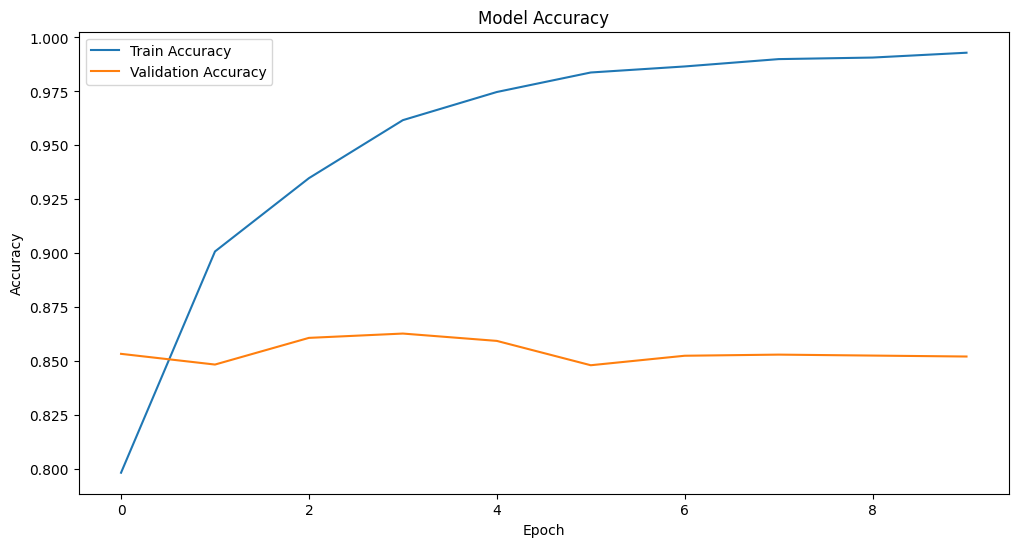

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [90]:
word_index = imdb.get_word_index()
reverse_word_index = {value : key for key, value in word_index.items()}

In [91]:
def decode_review(encoded_review):
    """Convert an encoded review back into text"""
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

In [92]:
print("\nPredicting sentiments for sample reviews...")
predictions = model.predict(X_test[:5])


Predicting sentiments for sample reviews...
1/1 [==============================] - 0s 467ms/step


In [93]:
for i, pred in enumerate(predictions):
    decoded_review = decode_review(X_test[i])
    sentiment = "Positive" if pred >= 0.5 else "Negative"
    actual_sentiment = "Positive" if y_test[i] == 1 else "Negative"
    print(f"\nReview {i+1}: ")
    print(f"Text: {decoded_review}")
    print(f"Predicted Sentiment: {sentiment}, Actual Label: {actual_sentiment}")


Review 1: 
Text: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
Predicted Sentiment: Negative, Actual Label: Negative

Review 2: 
Text: psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker char